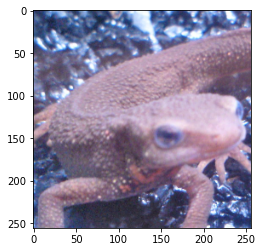

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

img_orig = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png')

plt.imshow(img_orig)
plt.show()


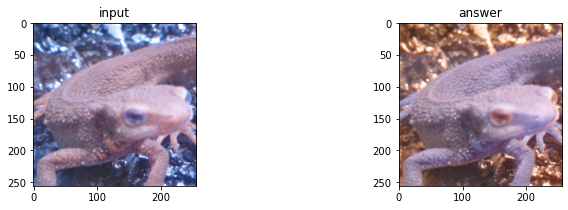

In [2]:
#1.画像を読み込み、RGBをBGRの順に入れ替えよ。
# def rgb2bgr(img):
#     return img[..., ::-1]
# img_bgr = rgb2bgr(img_orig)

img_bgr=cv2.cvtColor(img_orig, cv2.COLOR_RGB2BGR)
    
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('answer')
plt.imshow(img_bgr)
plt.show()

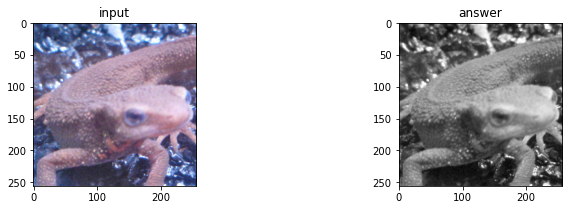

In [3]:
#2.画像をグレースケールにせよ。 グレースケールとは、画像の輝度表現方法の一種であり下式で計算される。
# def rgb2gray(img):
#     _img = img.copy().astype(np.float32)
#     gray = _img[..., 0] * 0.2126 + _img[..., 1] * 0.7152 + _img[..., 2] * 0.0722
#     gray = np.clip(gray, 0, 255)
#     return gray.astype(np.uint8)
# img_gray = rgb2gray(img_orig)

img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('answer')
plt.imshow(img_gray, cmap='gray')
plt.show()

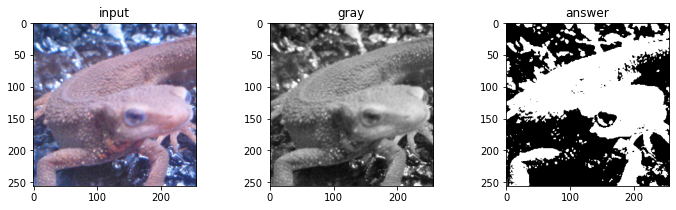

In [4]:
#3.画像を二値化せよ。 二値化とは、画像を特定の値を閾値(しきいち)として黒と白の二値で表現する方法である。
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)
th, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

# def binary(img, th):
#     _img = img.copy()
#     _img = np.minimum(_img // th, 1) * 255
#     return _img.astype(np.uint8)

# img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)
# img_bin = binary(img_gray, 127)

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 3, 2)
plt.title('gray')
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('answer')
plt.imshow(img_bin, cmap='gray')
plt.show()

threshold >> 129.0


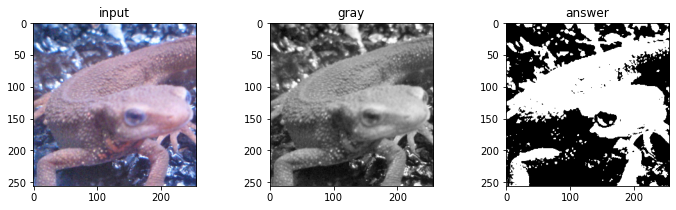

In [5]:
#4.大津の二値化を実装せよ。大津の二値化とは判別分析法と呼ばれ、二値化における分離の閾値を自動決定する教師なし手法である。 これはクラス内分散とクラス間分散の比から計算される。

th, img_bin = cv2.threshold(img_gray, 0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('threshold >>', th)

# def otsu_thresh(img):
#     max_vari = -1
#     max_th = 0
#     for th in range(1, 254):
#         m0 = img[img <= th].mean() # mean class 0
#         m1 = img[img > th].mean() # mean class 1
#         w0 = img[img <= th].size # pixel num class 0
#         w1 = img[img > th].size # pixel num class 1
#         vari = w0 * w1 / ((w0 + w1) ** 2) * ((m0 - m1) ** 2) # inter class variance
#         if vari > max_vari:
#             max_th = th
#             max_vari = vari
            
#     img = binary(img, max_th)
            
#     return max_th, img

# th, img_bin = otsu_thresh(img_gray)
# print('threshold >>', th)

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 3, 2)
plt.title('gray')
plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('answer')
plt.imshow(img_bin, cmap='gray')
plt.show()

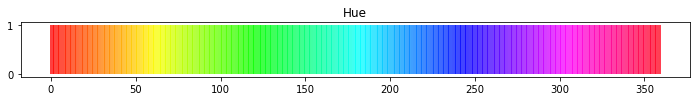

In [6]:
from matplotlib import cm
plt.figure(figsize=(12, 1))
plt.title('Hue')
for i in range(360):
    plt.vlines(i, 0, 1, color=cm.hsv(i / 360))
plt.show()

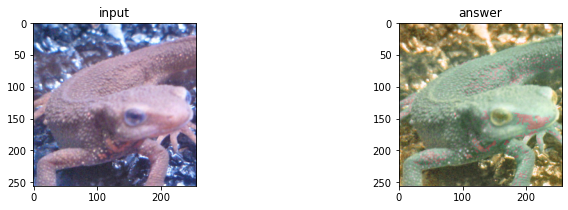

In [9]:
#5.HSV変換を実装して、色相Hを反転（Hを180度反転）せよ。

hsv = cv2.cvtColor(img_orig, cv2.COLOR_RGB2HSV) # RGB -> HSV
hsv[..., 0] = (hsv[..., 0] + 90) % 180 # Hue of opencv is defined [0, 180]
img_hsv = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB) # HSV -> RGB

# def rgb2hsv(img):
#     _img = img.copy().astype(np.float32)# / 255
#     v_max = _img.max(axis=2)
#     v_min = _img.min(axis=2)
#     v_argmin = _img.argmin(axis=2)
#     hsv = np.zeros_like(_img, dtype=np.float32)
#     r, g, b = np.split(_img, 3, axis=2)
#     r, g, b = r[..., 0], g[..., 0], b[..., 0]

#     diff = np.maximum(v_max - v_min, 1e-10)
    
#     # Hue
#     ind = v_argmin == 2
#     hsv[..., 0][ind] = 60 * (g - r)[ind] / diff[ind] + 60
#     ind = v_argmin == 0
#     hsv[..., 0][ind] = 60 * (b - g)[ind] / diff[ind] + 180
#     ind = v_argmin == 1
#     hsv[..., 0][ind] = 60 * (r - b)[ind] / diff[ind] + 300
#     ind = v_max == v_min
#     hsv[..., 0][ind] = 0
#     # Saturation
#     hsv[..., 1] = v_max - v_min
#     # Value
#     hsv[..., 2] = v_max
#     return hsv

# def hsv2rgb(hsv):
#     h, s, v = np.split(hsv, 3, axis=2)
#     h, s, v = h[..., 0], s[..., 0], v[..., 0]
#     _h = h / 60
#     x = s * (1 - np.abs(_h % 2 - 1))
#     z = np.zeros_like(x)
#     vals = np.array([[s, x, z], [x, s, z], [z, s, x], [z, x, s], [x, z, s], [s, z, x]])
    
#     img = np.zeros_like(hsv)
    
#     for i in range(6):
#         ind = _h.astype(int) == i
#         for j in range(3):
#             img[..., j][ind] = (v - s)[ind] + vals[i, j][ind]
            
#     return np.clip(img, 0, 255).astype(np.uint8)
   
# hsv = rgb2hsv(img_orig) # RGB -> HSV
# hsv[..., 0] = (hsv[..., 0] + 180) % 360 # Hue of opencv is defined [0, 180]
# img_hsv = hsv2rgb(hsv) # HSV -> RGB

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('answer')
plt.imshow(img_hsv)
plt.show()

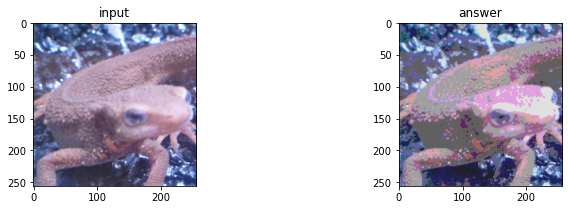

In [11]:
#6.ここでは画像の値を256^3から4^3、すなわちR,G,B を次式にしたがって{32, 96, 160, 224}の4値に減色せよ。 これは量子化操作である。

def color_subtraction(img, div=4):
    th = 256 // div
    return np.clip(img // th * th + th // 2, 0, 255)

img_sub = color_subtraction(img_orig) # color subtract

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1, 2, 2)
plt.title('answer')
plt.imshow(img_sub)
plt.show()